<a href="https://colab.research.google.com/github/thoratkomal/Deep-Learning/blob/main/Handwritten_Digit_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit CNN Project - Komal Thorat


### Reading the dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Viewing first image from train data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

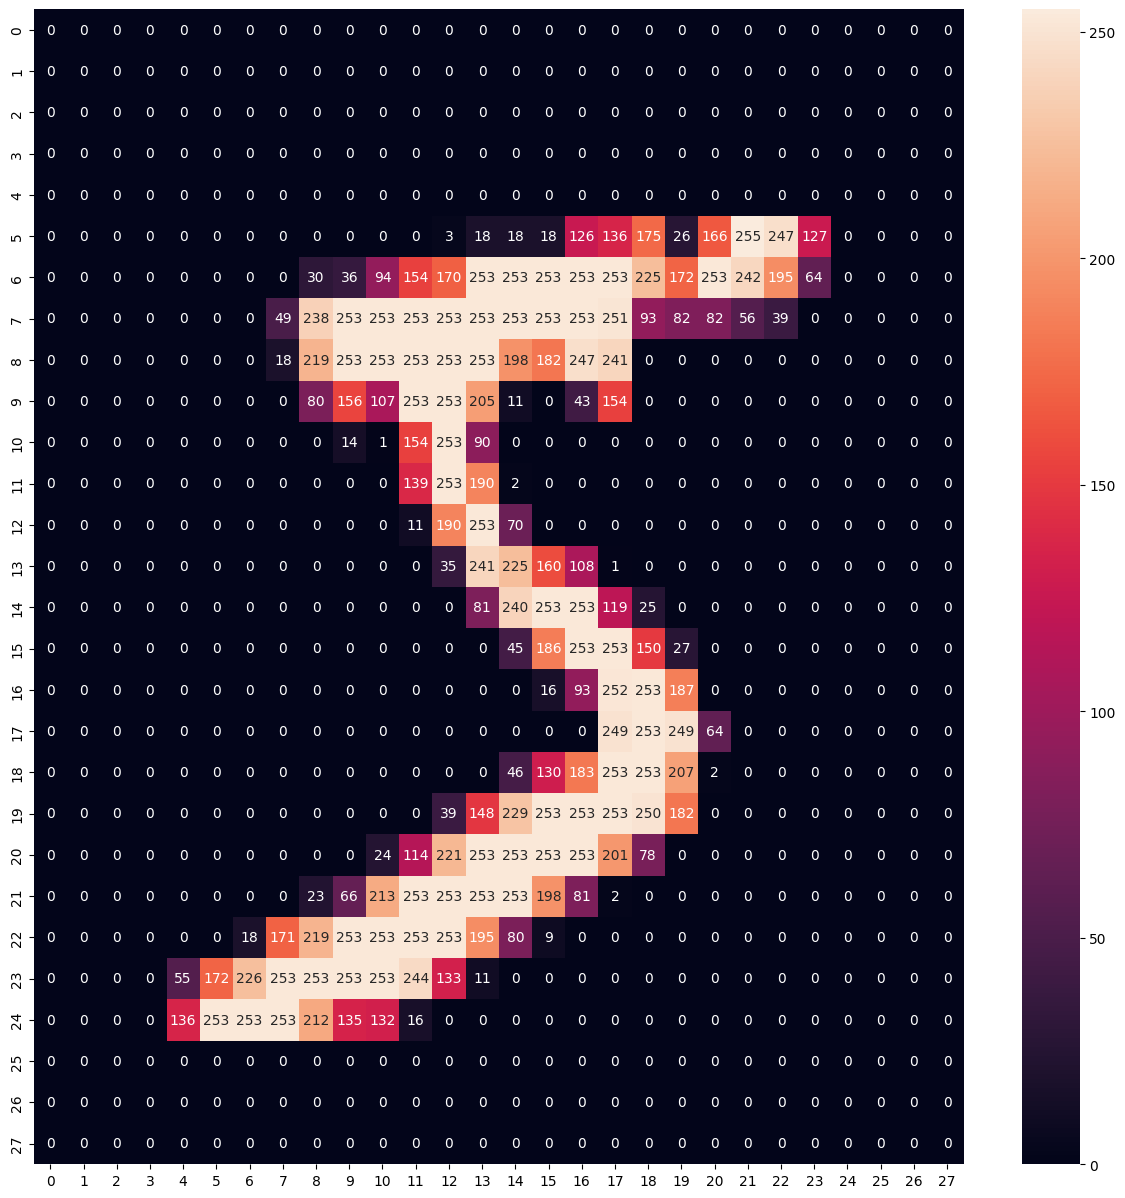

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

In [9]:
ytrain[0]

5

In [10]:
xtrain[0].shape

(28, 28)

### Visualize top 9 images from xtrain data

In [11]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


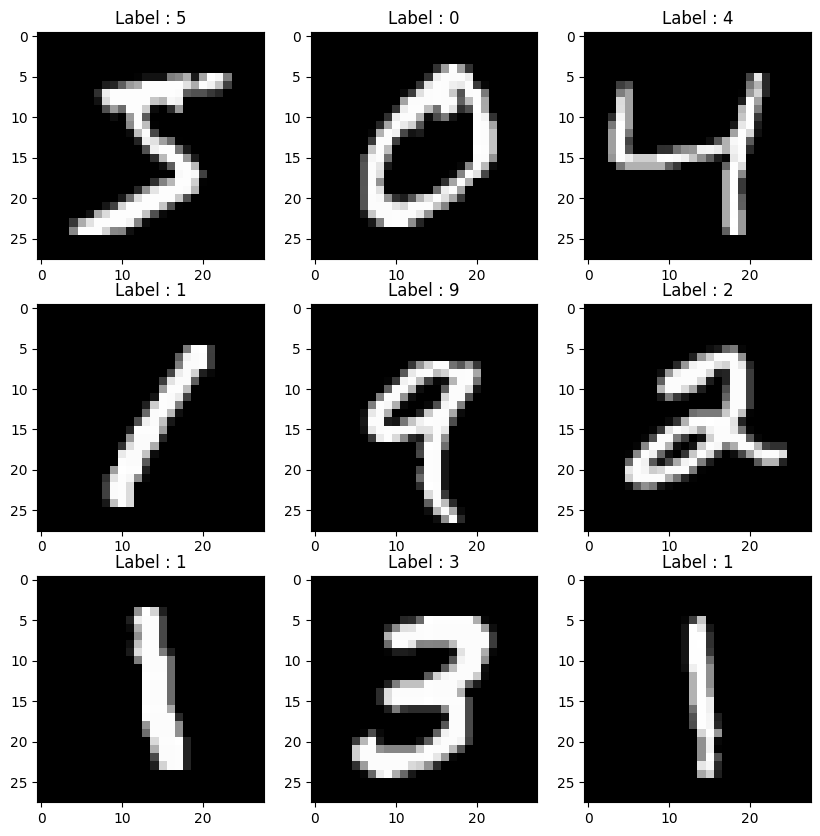

In [13]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Label : {ytrain[i]}')

In [14]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
len(np.unique(ytrain))

10

### Because i have more than 2 classes above becomes a multiclass classificion problem

### Preprocessing the data

In [16]:
# scale the x data divide by 255
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [18]:
# Apply one hotencoding on target features because it multiclass  classification problem
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [19]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [26]:
# model structure
model = Sequential()

# Add input layer
model.add(Input(shape=(28, 28, 1)))

# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu'))
# Add max pooling 1
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu'))
# Add max pooling 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Add Dropout layer
model.add(Dropout(rate=0.5))

# Dense layer multiclass - softmax
model.add(Dense(units=10, activation = 'softmax'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

### compile the model

In [28]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = (['accuracy']))

### Train the neural network

In [29]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 13s 4ms/step - loss: 0.2169 - accuracy: 0.9319 - val_loss: 0.0567 - val_accuracy: 0.9845
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9752 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9795 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 4/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0558 - accuracy: 0.9832 - val_loss: 0.0329 - val_accuracy: 0.9903
Epoch 5/15
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0272 - val_accuracy: 0.9915
Epoch 6/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0309 - val_accuracy: 0.9928
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0294 - val_accura

### plot the learning curve for the model

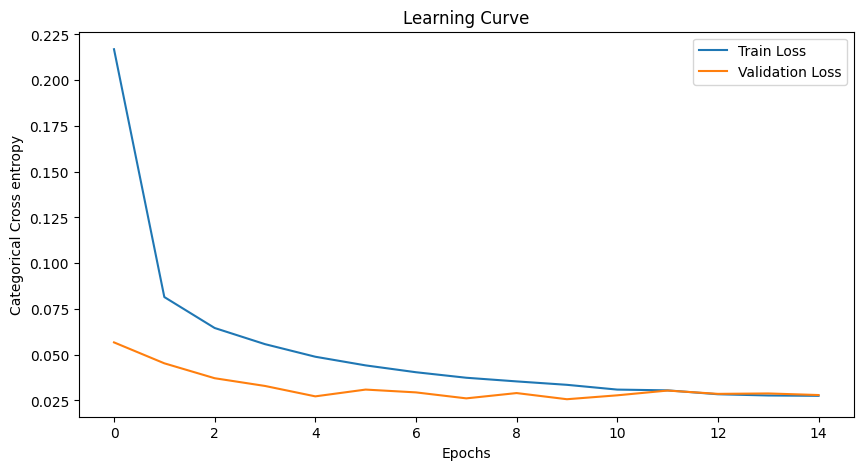

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [31]:
# training evaluation
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0110 - accuracy: 0.9969


[0.01095124427229166, 0.9969000220298767]

In [32]:
# testing evaluation
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9925


[0.02267826721072197, 0.9925000071525574]

### Predict the probability for train and test

In [33]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [34]:
yprob_train[0:5]

array([[3.7851769e-13, 2.6983665e-10, 1.0373923e-10, 2.9852512e-04,
        7.0127751e-15, 9.9970120e-01, 1.1162705e-12, 2.5781013e-10,
        2.5090202e-07, 1.9738074e-08],
       [9.9999964e-01, 7.3766050e-15, 2.0605614e-07, 1.8881229e-12,
        3.0311607e-11, 6.6627660e-13, 9.7819921e-09, 1.6187092e-13,
        2.5665949e-09, 8.0469121e-08],
       [1.2311186e-16, 1.4136428e-08, 4.6100127e-11, 6.6740133e-12,
        9.9999976e-01, 2.3141799e-12, 9.3106017e-14, 1.3639992e-07,
        8.8530433e-11, 1.1871693e-07],
       [5.6598900e-08, 9.9996054e-01, 2.3495093e-06, 3.1391820e-10,
        3.1149357e-05, 1.3715404e-10, 6.6231053e-08, 3.4228547e-06,
        2.3337057e-06, 5.5275560e-08],
       [7.7600209e-12, 1.5770446e-10, 1.0977511e-09, 7.2341799e-09,
        1.6015505e-05, 2.4136804e-10, 3.1280545e-13, 3.0507519e-07,
        7.6866836e-06, 9.9997604e-01]], dtype=float32)

In [35]:
yprob_train[0]

array([3.7851769e-13, 2.6983665e-10, 1.0373923e-10, 2.9852512e-04,
       7.0127751e-15, 9.9970120e-01, 1.1162705e-12, 2.5781013e-10,
       2.5090202e-07, 1.9738074e-08], dtype=float32)

### Predictions for train and test

In [36]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [37]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [38]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [39]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [40]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

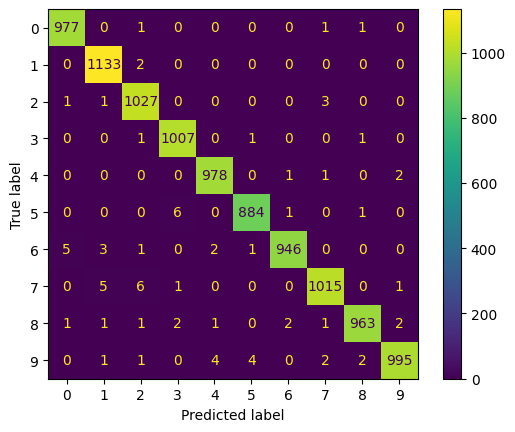

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the keras model for future use

In [43]:
model.save('handwrittenModel.keras')

### Load the above model

In [44]:
from keras.models import load_model
m = load_model('/content/handwrittenModel.keras')
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             